<a id='top'></a>

# [#fot](https://twitter.com/search?q=%23fot&src=typed_query) Tracking Data
### By [Edd Webster](https://www.twitter.com/eddwebster)
Last updated: 02/05/2020<br><br>
Video Sources by [Laurie Shaw](https://twitter.com/EightyFivePoint):
*    [Introduction to football analysis with tracking data in python](https://www.youtube.com/watch?v=8TrleFklEsE)
*    [Delving deeper into the tracking data with python: measuring the physical performance of players](https://www.youtube.com/watch?v=VX3T-4lB2o0E)
*    [Advanced football analytics: building and applying a pitch control model in python](https://www.youtube.com/watch?v=5X1cSehLg6s) 

![title](img/fot_banner.jpg)

Drawing by Virginia Armas ([@Sk3tchyourlife](https://twitter.com/sk3tchyourlife))

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

<a id='sectionintroduction'></a>

## Introduction
This notebook is a short Exploratory Data Analysis (EDA) of Tracking football data [Python]() using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [EddWebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [@eddwebster](https://www.twitter.com/eddwebster),
*    [LinkedIn.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/),
*    [GitHub/eddwebster](https://github.com/eddwebster/),
*    [Kaggle.com/eddwebster](https://www.kaggle.com/eddwebster), and
*    [HackerRank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](img/fifa20eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/fifa-league) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/fifa-league/blob/master/FIFA%2020%20Fantasy%20Football%20League%20using%20TransferMarkt%20Player%20Valuations.ipynb). The accompanying GitHub repository of start code can be found in the [LaurieOnTracking](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking) GitHub subrepository, part of the [Friends of Tracking](https://github.com/Friends-of-Tracking-Data-FoTD) GitHub repository.

<a id='sectioncontents'></a>

## Notebook Contents
1.    [Notebook Dependencies](#section1)<br>
2.    [Notebook Brief](#section2)<br>
3.    [Introduction to football analysis with tracking data in python](#section3)<br>
      3.1.   [Introduction](#section3.1)<br>
      3.2.   [Video 1 Code](#section3.2)<br>
      3.3.   [Homework](#section3.3)<br>
4.    [Delving deeper into the tracking data with python: measuring the physical performance of players](#section4)<br>
      4.1.   [Introduction](#section4.1)<br>
      4.2.   [Video 2 Code](#section4.2)<br>
5.    [Advanced football analytics: building and applying a pitch control model in python](#section5)<br>
      5.1.   [Introduction](#section5.1)<br>
      5.2.   [Video 3 Code](#section5.2)<br>   
6.    [Summary](#section6)<br>
7.    [Bibliography](#section7)<br>

<a id='section1'></a>

## 1. Notebook Dependencies

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [Jupyter notebooks](https://jupyter.org/) for this interactive computational environment that the project is presented,
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion, and
*    [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) for visualisations.

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

In [1]:
# Import modules

# Python ≥3.5 (ideally)
import platform
import sys
assert sys.version_info >= (3, 5)

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np

# Data Preprocessing
import pandas as pd
import os    #  used to read the csv filenames
import re
import random

# Working with JSON
import json
from pandas.io.json import json_normalize

# Football libraries
from FCPython import createPitch
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import Metrica_PitchControl as mpc

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from matplotlib.patches import Arc

# Machine Learning
import scipy as sp

# Display in Jupyter
from IPython.display import Image, Video, YouTubeVideo
from IPython.core.display import HTML

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('SciPy: {}'.format(sp.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0
SciPy: 1.4.1


<a id='section2'></a>

## 2. Notebook Brief
This workbook looks at how to load in and manipulate football data (json files) from the Metrica Sports repository into a Jupyter notebook.

Sources:
*    [Introduction to football analysis with tracking data in python](https://www.youtube.com/watch?v=8TrleFklEsE)
*    [Delving deeper into the tracking data with python: measuring the physical performance of players](https://www.youtube.com/watch?v=VX3T-4lB2o0E)
*    [Advanced football analytics: building and applying a pitch control model in python](https://www.youtube.com/watch?v=5X1cSehLg6s) 

<a id='section3'></a>

## 3. Introduction to Football Analysis with Tracking Data in Python

<a id='section3.1'></a>

### 3.1. Introduction
The content from this section is based on the code from [Laurie Shaw](https://twitter.com/EightyFivePoint)'s [Introduction to football analysis with tracking data in Python](https://www.youtube.com/watch?v=8TrleFklEsE) video from [David Sumpter](https://twitter.com/Soccermatics)'s [Friends of Tracking](https://www.youtube.com/channel/UCUBFJYcag8j2rm_9HkrrA7w/) YouTube channel.

In this section, we'll be working with player tracking data, and show how we can use this to create shot maps with both tracking and event data.

The data provided by [Metrica Sports](https://github.com/metrica-sports/sample-data) is 6 individual CSV files -  3 files for two sample matches. For each match there is an events data csv file and tracking data csv files for the home and away teams.

In this section, we'll be working with player tracking data, and shows how to create shot maps with both tracking and event data.

<u><b>Note:</b></u> all the visualisation in the notebook are the inverse of the y-axis of those in the video. This is because the coordinate system was changed by the code author, [Laurie Shaw](https://twitter.com/EightyFivePoint) after the first video. The origin (0,0) is no longer in the top left of the pitch but is now the bottom left.

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

This section is an introduction to analysing tracking data in Python, in which we'll be doing the following:
*    Reading and manipulating Metrica's tracking & event data
*    Using tracking data to add context to shot and pass map

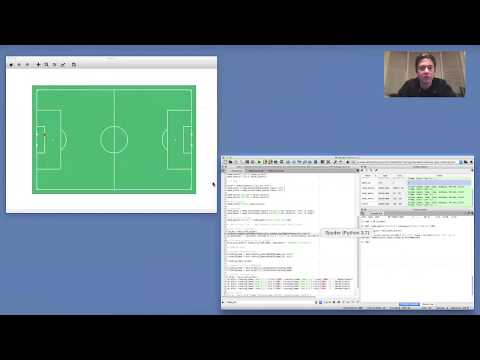

In [3]:
# Introduction to football analysis with tracking data in Python
YouTubeVideo('8TrleFklEsE', width=800, height=470)

<a id='section3.2'></a>

### 3.2. Video 1 Code

In [4]:
# Set up initial path to data
DATADIR = './data/metrica'
game_id = 2     # sample match 2

<a id='section3.2.1'></a>

#### 3.2.1 Events Data

In [5]:
# Read in the event data - uses Metrica_IO library
events = mio.read_event_data(DATADIR,game_id)    # reads in data into the DataFrame and returns events

In [6]:
# See all the types and quantities of each event
events['Type'].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

In [7]:
# Unit conversion from metric data units to meters
events = mio.to_metric_coordinates(events)

![title](img/metricacoordinates.png)

Coordinates in the diagram as discussed in the video are wrong, the origin (0,0) is in fact the top left, not the bottom left. So the diagram needs to be flipped. See the Metrica_IO.py script, in the `to_metric_coordinates()` function, where a full explanation of this change can be found.

In [8]:
# Create seperate Events DataFrames for each team
home_events = events[events['Team'] == 'Home']
away_events = events[events['Team'] == 'Away']

In [9]:
# Freqeuency of Events of the Home team
home_events['Type'].value_counts()

PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: Type, dtype: int64

In [10]:
# Freqeuency of Events of the Away team
away_events['Type'].value_counts()

PASS              421
CHALLENGE         151
BALL LOST         113
RECOVERY          113
SET PIECE          46
BALL OUT           22
FAULT RECEIVED     11
SHOT               11
CARD                3
Name: Type, dtype: int64

In [11]:
# Create Shots DataFrames

## Create a (all) Shots DataFrame
shots = events[events['Type'] == "SHOT"]

## Create a Home Shots DataFrame
home_shots = home_events[home_events.Type == "SHOT"]

## Create a Home Shots DataFrame
away_shots = away_events[away_events.Type == "SHOT"]

In [12]:
# Frequency of Events for Home Shots DataFrame
home_shots['Subtype'].value_counts()

HEAD-OFF TARGET-OUT    4
ON TARGET-SAVED        4
OFF TARGET-OUT         2
ON TARGET-GOAL         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64

In [13]:
# Frequency of Events for Away Shots DataFrame
away_shots['Subtype'].value_counts()

OFF TARGET-OUT         3
ON TARGET-GOAL         2
BLOCKED                2
ON TARGET-SAVED        2
OFF TARGET-HEAD-OUT    1
HEAD-OFF TARGET-OUT    1
Name: Subtype, dtype: int64

In [14]:
# Which player took Home Shots?
home_shots['From'].value_counts()

Player9     4
Player10    3
Player5     2
Player7     1
Player4     1
Player12    1
Player3     1
Name: From, dtype: int64

In [15]:
# Which player took Away Shots?
away_shots['From'].value_counts()

Player24     2
Player20     2
Player19     2
Player21     1
Player22     1
Player18     1
Player23     1
Player 26    1
Name: From, dtype: int64

In [16]:
# Get goals
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy()
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')].copy()

In [17]:
# View Home Goals
home_goals.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


In [18]:
# Look at first goal - what happened?

Text(-47.7, -3.400000000000003, '')

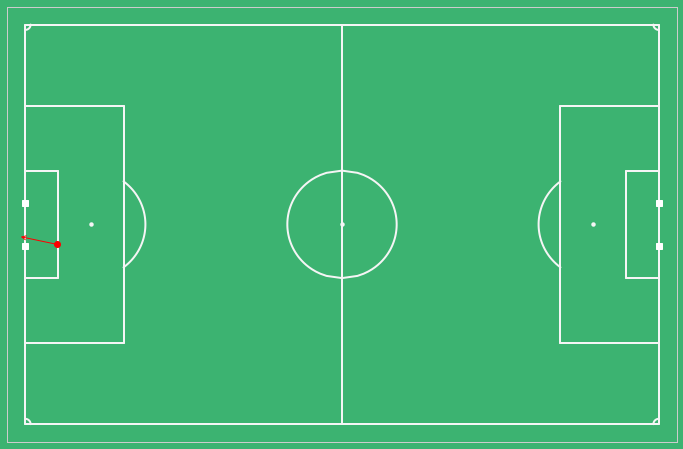

In [19]:
# Plot shots - PLOTTEDR
fig, ax = mviz.plot_pitch()
ax.plot(events.loc[198]['Start X'], events.loc[198]['Start Y'], 'ro')
ax.annotate("", xy = events.loc[198][['End X','End Y']], xytext = events.loc[198][['Start X','Start Y']], alpha=0.6, arrowprops = dict(arrowstyle = "->", color='r'))

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a19a551d0>)

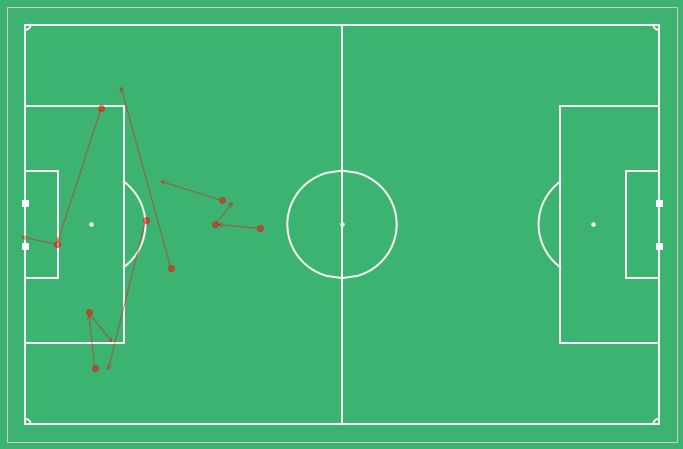

In [20]:
# Plot pass move in run up to goal
mviz.plot_events(events.loc[190:198], indicators = ['Marker', 'Arrow'])

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1922e1d0>)

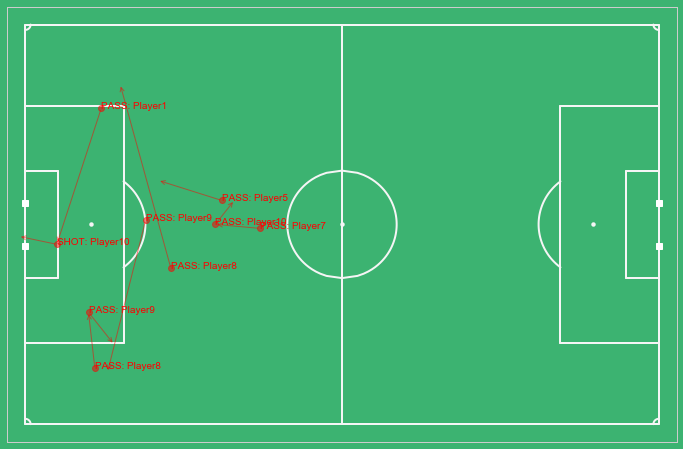

In [21]:
# Plot pass move in run up to goal
mviz.plot_events(events.loc[190:198], indicators = ['Marker', 'Arrow'], annotate=True)    # show player names

<a id='section3.2.2'></a>

#### 3.2.2 Tracking Data

In [22]:
# Reading in tracking data
tracking_home = mio.tracking_data(DATADIR, game_id, 'Home')
tracking_away = mio.tracking_data(DATADIR, game_id, 'Away')

Reading team: home
Reading team: away


In [23]:
tracking_home.columns

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')

In [24]:
tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,...,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
tracking_home.shape    # 141,156 rows i.e. frames

(141156, 32)

In [26]:
# i.e 25 frames per second, in 90 minutes
25 * 60 * 90

135000

In [27]:
# Convert to pitch coordinates
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

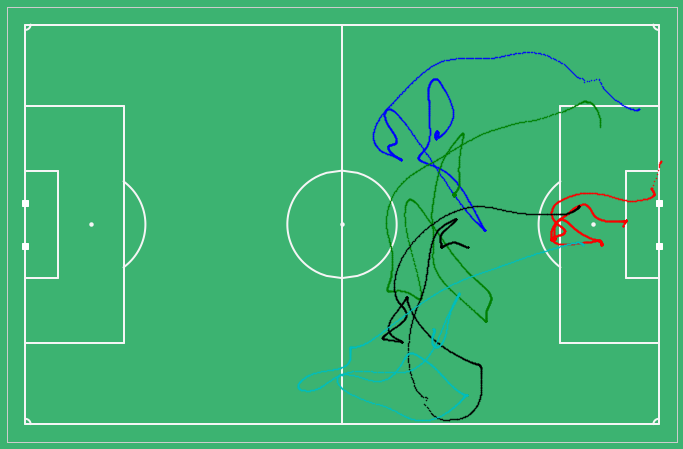

In [28]:
# Plotting tracking data -  of the first 60 seconds (i.e. 60 x 90 = 1500 frames)
fig,ax = mviz.plot_pitch()
ax.plot(tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', MarkerSize=1)
ax.plot(tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', MarkerSize=1)
ax.plot(tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g.', MarkerSize=1)
ax.plot(tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k.', MarkerSize=1)
ax.plot(tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c.', MarkerSize=1)

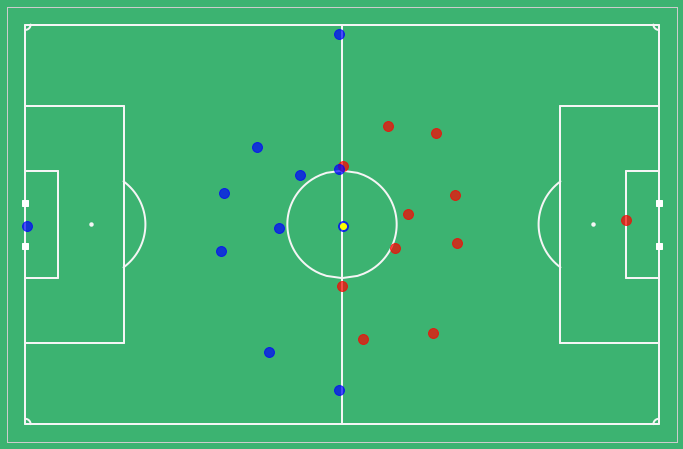

In [29]:
# Plot the positions of the players at kick off
fix,ax = mviz.plot_frame(tracking_home.loc[51], tracking_away.loc[51])

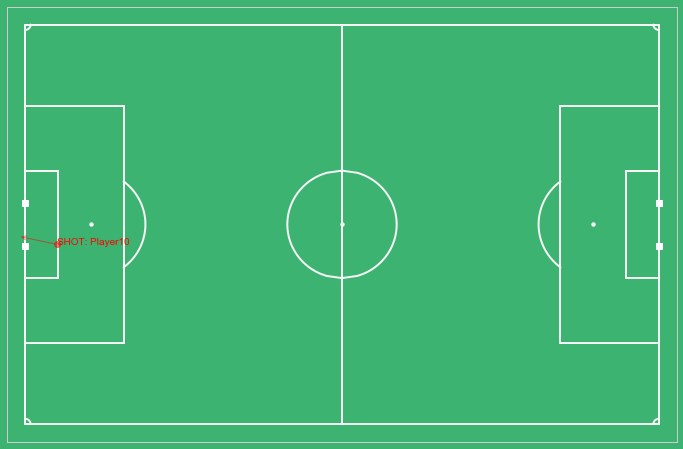

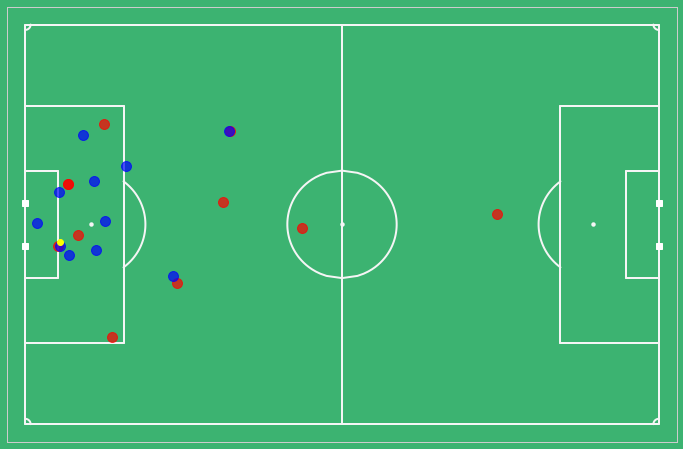

In [30]:
# Plot the positions of the players at the goal
fix,ax = mviz.plot_events(events.loc[198:198], indicators = ['Marker', 'Arrow'], annotate=True)
frame = events.loc[198]['Start Frame']    # frame where first goal took place - 12,202

fig,ax = mviz.plot_frame(tracking_home.loc[frame], tracking_away.loc[frame])

<a id='section3.3'></a>

### 3.3 Homework
1.    Plot the passes and shot leading up to the second and third goals in the match.
2.    Plot all the shots by Player 9 of the home team. Use a different symbol and transparency (alpha) for shots that resulted in goals
3.    Plot the positions of all players at Player 9's goal
4.    Calculate how far each player ran

Tweet answers to #FoT

The first two questions use the event data, the second two questions use the tracking data.

Answers to the homework can be found in the following video from the 2m50s mark up until the 18m55s mark.

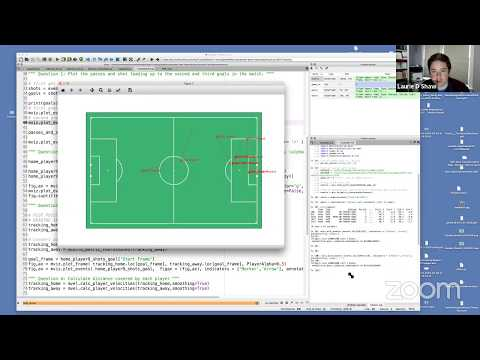

In [31]:
# Friends of Tracking Live: Homework and more - ans to video 1 homework @ 2m50s
YouTubeVideo('wnab8-oukzs', width=800, height=470)

<a id='section3.3.1'></a>

#### 3.3.1. Plot the passes and shot leading up to the second and third goals in the match.

In [32]:
# All shots
shots = events[events['Type'] == 'SHOT'].copy()
goals = shots[shots['Subtype'].str.contains('-GOAL')].copy()

In [33]:
goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,-40.28,-1.36,-55.12,-2.72
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


From the goals DataFrame, we can see that there were five goals in the game, with the home team winning 3-2.

From the DataFrames, We can see the goals were scored in the following frames:
*    Goal 1: 198
*    Goal 2: 823
*    Goal 3: 1,118
*    Goal 4: 1,671
*    Goal 5: 1,723

This can be explored in the `events` DataFrame using the variable explorer to see at what frame the moves began.

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1a8f0b90>)

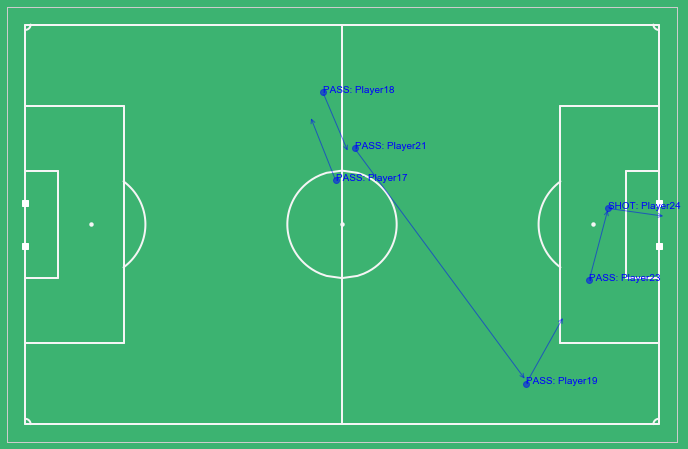

In [34]:
# Plot pass move in run up to the second goal for the away team (blue) - frames 818 to 823
mviz.plot_events(events.loc[818:823], indicators = ['Marker', 'Arrow'], annotate=True, color='b')

From the DataFrame for events, we can see that for the second goal for the away team (blue) there were five passes leading up the shot, started from frame 818, which resulted in a goal in frame 823.

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1ada58d0>)

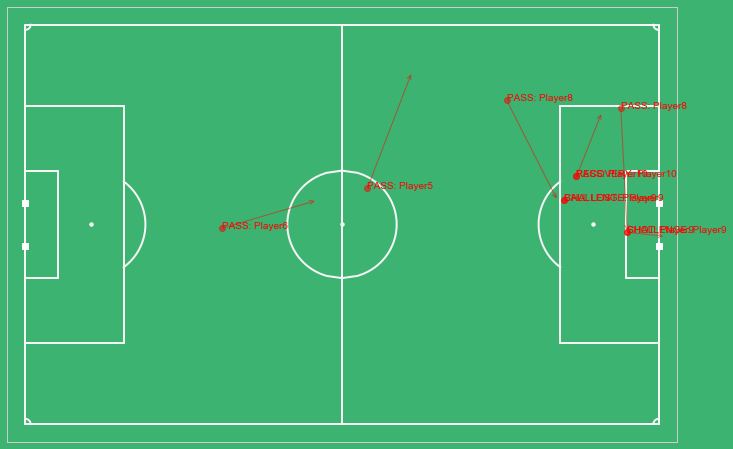

In [35]:
# Plot pass move in run up to the third goal for the home team (red)- frames 1,109 to 1,118
mviz.plot_events(events.loc[1109:1118], indicators = ['Marker', 'Arrow'], annotate=True, color='r')

From the DataFrame for events, we can see that for the third goal for the home team (red) there were five passes leading up the shot, started from frame 1,109, which resulted in a goal in frame 1,118.

In parts the goal seems a little obscure, that's because there were a couple of challenges leading up to the goal, as well as the passes and shots.

We can maken this a little clearer by filtering the event data only for passes and shots, as the following:

In [36]:
passes_and_shots = events[events['Type'].isin(['SHOT', 'PASS'])]

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1afdb990>)

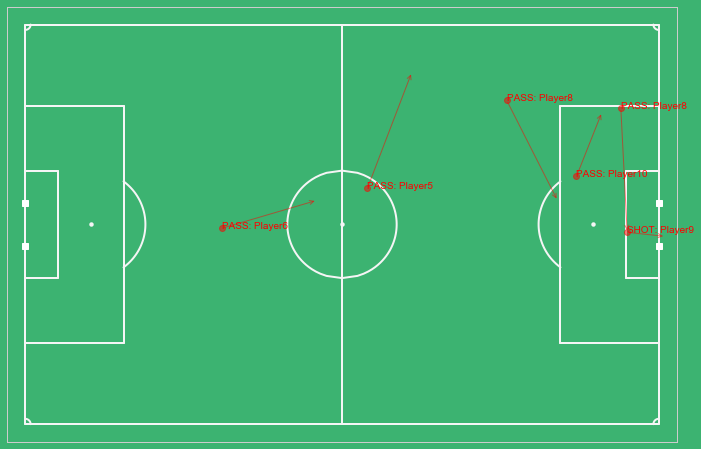

In [37]:
# Plot pass move in run up to the third goal for the home team (red), this time using the passes and shots DataFrame - frames 1,109 to 1,118
mviz.plot_events(passes_and_shots.loc[1109:1118], indicators = ['Marker', 'Arrow'], annotate=True, color='r')

The plot for the second goal is now a lot tidier, showing only the five passes leading up to the goal, as well as the shot.

<a id='section3.3.2'></a>

#### 3.3.2. Plot all the shots by Player 9 of the home team. Use a different symbol and transparency (alpha) for shots that resulted in goals

In [38]:
# Frist, create DataFrame for all player 9 of the Home team's shots
home_player9_shots = events[(events['Team'] == "Home") & (events['Type'] == "SHOT") & (events['From'] == "Player9")]

In [39]:
home_player9_shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.70,-1.36,54.06,-2.04
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36


We can see from the DataFrame that player 9 of the Home team had 4 shots - 1 goal, 2 off-target and 1 saved by the goalkeeper.

In [40]:
# Using the home_player9_shots DataFrame, next create two DataFrames that seperates those shots that are goals and those that are not goals
home_player9_shots_goal = home_player9_shots[home_player9_shots['Subtype'].str.contains('-GOAL')]
home_player9_shots_nogoal = home_player9_shots[~home_player9_shots['Subtype'].str.contains('-GOAL')]

In [41]:
home_player9_shots_goal

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.7,-1.36,54.06,-2.04


In [42]:
home_player9_shots_nogoal

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36


Text(0.5, 0.92, 'Home team Player9 shots')

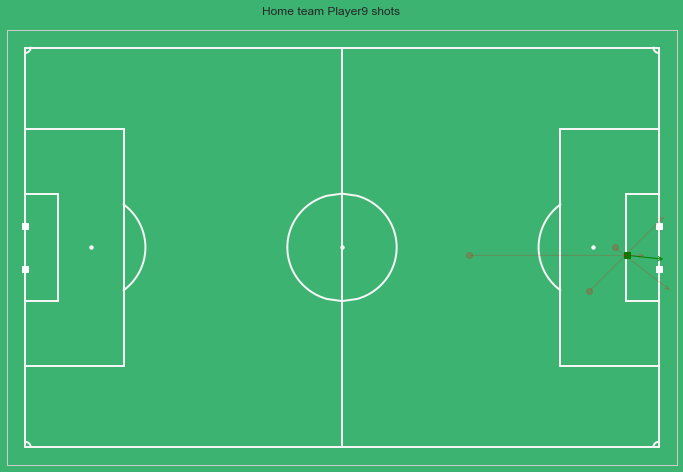

In [43]:
fig,ax = mviz.plot_events(home_player9_shots_goal, indicators = ['Marker', 'Arrow'], annotate = False, color = 'g', alpha= 1, marker_style = "s")
mviz.plot_events(home_player9_shots_nogoal, figax = (fig,ax), indicators = ['Marker', 'Arrow'], annotate = False, color = 'r', alpha = 0.2, marker_style = "o")
fig.suptitle('Home team Player9 shots', y = 0.92)

<a id='section3.3.3'></a>

#### 3.3.3. Plot the positions of all players at Player 9's goal

In [44]:
# Reading in tracking data
tracking_home = mio.tracking_data(DATADIR, game_id, 'Home')
tracking_away = mio.tracking_data(DATADIR, game_id, 'Away')

Reading team: home
Reading team: away


In [45]:
# Convert positions from metric units to meters
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

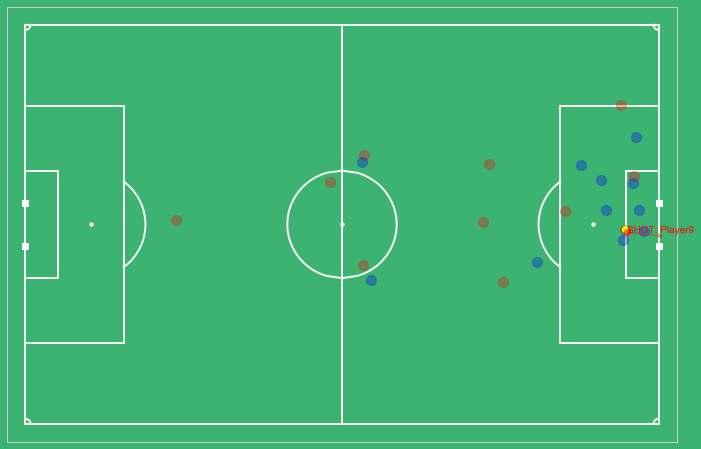

In [46]:
goal_frame = home_player9_shots_goal['Start Frame']
fig,ax = mviz.plot_frame(tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], PlayerAlpha = 0.3)
fig, ax = mviz.plot_events(home_player9_shots_goal, figax = (fig,ax), indicators = ['Marker', 'Arrow'], annotate = True)

<a id='section3.3.4'></a>

#### 3.3.4. Calculate the distance covered by each player

Need to fix this code. Struggling to get the `calc_player_velocities()` function from the `Metrica_velocities` library working (all code in this file pasted below.

In [47]:
# Calculate player velocities
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')

In [48]:
# Look through home and away teams seperately
teams ['Home', 'Away']
data = [tracking_home, tracking_away]
for name,data in zip(teams, data):
    team_players = np.unique([c.split('_')[1] for c in the data.columns if c[:4] == name])
    team_summary = pd.DataFrame(index = team_players)
    
    # Calculate total distance covered for each player
    distance = []
    for player in team_summary.index:
        column = name + '_' + player + '_speed'
        player_distance = data[column].sum()/25./1000 # this is the sum of the distance travelled from one observation to another
        distance.append(player_distance)
        
    team_summary['Distance [km]'] = distance
    team_summary = team_summary.sort_values(['Distance [km]'], ascending = False)
    
    print("****** " + name + " team summary ******")
    print(team_summary)
    # make a simple bar chart of distance covered for each player
    fig,ax = plt.subplots()
    ax = team_summary['Distance [km]'].plot.bar(rot=0)
    ax.set_xlabel['Player']
    ax.set_ylabel['Distance covered [km]']
    fig.suptitle(name + ' Team', y = 0.95)

SyntaxError: invalid syntax (<ipython-input-48-21fedf19ef2a>, line 5)

<a id='section4'></a>

## 4. Delving deeper into the tracking data with python: measuring the physical performance of players

<a id='section4.1'></a>

### 4.1. Introduction
The content from this section is based on the code from [Laurie Shaw](https://twitter.com/EightyFivePoint)'s [Delving deeper into the tracking data with python: measuring the physical performance of players](https://www.youtube.com/watch?v=VX3T-4lB2o0E) video from [David Sumpter](https://twitter.com/Soccermatics)'s [Friends of Tracking](https://www.youtube.com/channel/UCUBFJYcag8j2rm_9HkrrA7w/) YouTube channel.

In this section, we'll be working with the Metric event and tracking data, and how to use this tracking data to add further context to football analytics. This video covers: making movies from the data, measuring player velocities, and creating physical summary reports for players.

Delving deeper into tracking data:
1.    Making movies 
2.    Measuring player speed
3.    Generating physical performance reports

In this section, we'll be measuring the physical performance of players by analysing the following:
*    Player velocities
*    Creating bespoke phyiscal summary report

In [ ]:
# Delving deeper into the tracking data with python: measuring the physical performance of players
YouTubeVideo('VX3T-4lB2o0', width=800, height=470)

<a id='section4.2'></a>

### 4.2. Video 2 Code

<a id='section4.2.1'></a>

#### 4.2.1. Making Movies

In [ ]:
# Set up initial path to data
DATADIR = './data/metrica'
game_id = 2     # sample match 2

In [ ]:
# Read in the event data - uses Metrica_IO library
events = mio.read_event_data(DATADIR, game_id)    # reads in data into the DataFrame and returns events

In [ ]:
# Reading in tracking data
tracking_home = mio.tracking_data(DATADIR, game_id, 'Home')
tracking_away = mio.tracking_data(DATADIR, game_id, 'Away')

In [ ]:
# Convert positions from metric units to meters
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)
events = mio.to_metric_coordinates(events)

In [ ]:
# Reverse direction of a player so that home team is alway attacking right->left
tracking_home, tracking_away, events = mio.to_single_playing_direction(tracking_home, tracking_away, events)

In [ ]:
# Making a movie
PLOTDIR = './video/'
mviz.save_match_clip(tracking_home.iloc[73600:73600+500], tracking_away.iloc[73600:73600+500], PLOTDIR, fname = 'home_goal_2', include_player_velocities = False)

In [ ]:
# Embed home goal 2 video into the notebook
Video(PLOTDIR + "home_goal_2.mp4", width=770, height=530)

<a id='section4.2.2'></a>

#### 4.2.2. Measuring player speed

In [ ]:
# Calculate player velocities
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')

This can be explored in the `tracking_home` and `tracking_away` DataFrames using the variable explorer where we can see the additional columns for velocity have been added to the DataFrame. These columns are of the following, but for all the players:
*    `Away_15_vx`
*    `Away_15_vy`
*    `Away_15_speed` i.e. total speed

These new metricas are all measured in meters per second.

In [ ]:
mviz.plot_frame(tracking_home.loc[10000], tracking_away.loc[10000], include_player_velocities = True, annotate = True)

<a id='section4.2.3'></a>

#### 4.2.3. Generating physical performance reports

##### Minutes Played

In [ ]:
# Physical summary for home players
home_players = np.unique([ c.split('_')[1] for c in tracking_home.columns if c[:4] == 'Home'])
home_summary = pd.DataFrame(index=home_players)

In [ ]:
# Calculate minutes played for each player
minutes = []
for player in home_players:
    # search for first and last frames that we have a position observation for each player (when a player is not on the pitch positions are NaN)
    column = 'Home_' + player + '_x' # use player x-position coordinate
    player_minutes = (tracking_home[column].last_valid_index() - tracking_home[column].first_valid_index() + 1 ) / 25 / 60 # convert to minutes
    minutes.append(player_minutes)
home_summary['Minutes Played'] = minutes
home_summary = home_summary.sort_values(['Minutes Played'], ascending=False)

##### Distance Covered

In [ ]:
# Calculate total distance covered for each player
distance = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    player_distance = tracking_home[column].sum()/25./1000    # speed time time. Convert to km
    distance.append(player_distance)
home_summary['Distance [km]'] = distance

In [ ]:
# Make a simple bar chart of distance covered for each player
plt.subplots()
ax = home_summary['Distance [km]'].plot.bar(rot=0)
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')

Here we can visually see the total distances that the players ran. For example , we can see that player 11 ran about 5km and is most likely the goalkeeper. We can check this by plotting the position of the players at KO to find out exactly what position each player is playing.

In [ ]:
# Plot position at KO (to find out what position each player is playing)
mviz.plot_frame(tracking_home.loc[51], tracking_away.loc[51], include_player_velocities = False, annotate = True)

##### Distance covered: walking, jogging, running, sprinting

In [ ]:
walking = []
jogging = []
running = []
sprinting = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # walking (less than 2m/s)
    player_distance = tracking_home.loc[tracking_home[column] <2, column].sum()/25./1000
    walking.append(player_distance)
    # jogging (between 2 and 4 m/s)
    player_distance = tracking_home.loc[(tracking_home[column] >= 2) & (tracking_home[column] < 4), column].sum()/25./1000
    jogging.append(player_distance)
    # running (between 4 and 7 m/s)
    player_distance = tracking_home.loc[(tracking_home[column] >= 4) & (tracking_home[column] < 7), column].sum()/25./1000
    running.append(player_distance)
    # sprinting (greater than 7 m/s)
    player_distance = tracking_home.loc[tracking_home[column] >= 7, column].sum()/25./1000
    sprinting.append(player_distance)
    
home_summary['Walking [km]'] = walking
home_summary['Jogging [km]'] = jogging
home_summary['Running [km]'] = running
home_summary['Sprinting [km]'] = sprinting

In [ ]:
# Make a clustered bar chart of distance covered for each player at each speed
ax = home_summary[['Walking [km]', 'Jogging [km]', 'Running [km]', 'Sprinting [km]']].plot.bar(colormap='coolwarm')
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [m]')

##### Sustained sprints: how many sustained sprints per match

In [ ]:
# sustained sprints: how many sustained sprints per match did each player complete? Defined as maintaining a speed > 7 m/s for at least 1 second
nsprints = []
sprint_threshold = 7 # minimum speed to be defined as a sprint {m/s}
sprint_window = 1 * 25
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # trick here is to convolve speed with a window of size 'sprint_window', and find number of occassions that sprint was sustained for at least one window length
    # diff helps us to identify when the window starts
    player_sprints = np.diff(1 * (np.convolve(1 * (tracking_home[column] >= sprint_threshold), np.ones(sprint_window), mode='same') >= sprint_window))
    nsprints.append(np.sum(player_sprints == 1 ))
home_summary['# sprints'] = nsprints

In [ ]:
# Plot the trajectories for each of player 10's sprints
player = '10'
column = 'Home_' + player + '_speed' # spped
column_x = 'Home_' + player + '_x' # x position
column_y = 'Home_' + player + '_y' # y position
# same trick as before to find start and end indices of windows of size 'sprint_window' in which player speed was above the sprint_threshold
player_sprints = np.diff(1 * (np.convolve(1 * (tracking_home[column] >= sprint_threshold), np.ones(sprint_window), mode='same') >= sprint_window))
player_sprints_start = np.where(player_sprints == 1)[0] - int(sprint_window/2) + 1 # adding sprint_window/2 because of the way that the convolution is centred
player_sprints_end = np.where(player_sprints == -1)[0] + int(sprint_window/2) + 1
# now plot all the sprints
fig,ax = mviz.plot_pitch()
for s,e in zip(player_sprints_start,player_sprints_end):
    ax.plot(tracking_home[column_x].iloc[s], tracking_home[column_y].iloc[s], 'ro')
    ax.plot(tracking_home[column_x].iloc[s:e+1], tracking_home[column_y].iloc[s:e+1], 'r')

Notes from observing the tracking data of sprints for player 10:
*    The sprint to the by-line is an incident where the player is trying to keep the ball in play (ses Laurie's video in the last minute of video 2).

<a id='section4.3'></a>

### 4.3 Homework
1.    Estimate the *top speed* of each player
2.    Measure player acceleration from the tracking data and estimate the maximum rate of acceleration for each player.

<a id='section4.3.1'></a>

#### 4.3.1. Estimate the *top speed* of each player

<a id='section4.3.2'></a>

#### 4.3.2. Measure player acceleration from the tracking data and estimate the maximum rate of acceleration for each player

<a id='section5'></a>

## 5. Advanced football analytics: building and applying a pitch control model in python

<a id='section5.1'></a>

### 5.1. Introduction
The content from this section is based on the code from [Laurie Shaw](https://twitter.com/EightyFivePoint)'s [Delving deeper into the tracking data with python: measuring the physical performance of players](https://www.youtube.com/watch?v=VX3T-4lB2o0E) video from [David Sumpter](https://twitter.com/Soccermatics)'s [Friends of Tracking](https://www.youtube.com/channel/UCUBFJYcag8j2rm_9HkrrA7w/) YouTube channel.

In this section, we'll be working with the Metric event and tracking data, and how to use this tracking data to build your own pitch control module in python and demonstrates how it can be used to evaluate a player's passing options using tracking and event data.

Definition:
*Pitch control at a given location is the probability that a player (or team) will gain control of the ball if it moves directly to that location.*

Pitch control measures the probability that a team will retain possession of the ball if they pass it to another location on the field. It can be used to evaluate passing options for a player, and quantify the probability of success.

The method described here is based on work by [William Spearman](https://twitter.com/the_spearman), as described in his Friend of Tracking video tutorial: https://www.youtube.com/watch?v=X9PrwPyolyU

Also see his paper "Beyond Expected Goals" published at the 2018 MIT Sloan Sports Analytics Conference: http://www.sloansportsconference.com/wp-content/uploads/2018/02/2002.pdf

Delving deeper into tracking data:
1.    
2.    
3.    

In [ ]:
# Advanced football analytics: building and applying a pitch control model in python
YouTubeVideo('5X1cSehLg6s', width=800, height=470)

In [ ]:
# Liverpool FC data scientist William Spearman's masterclass in pitch control
YouTubeVideo('X9PrwPyolyU', width=800, height=470)

Pitch control is the probability that a player could control the ball assuming it is at that location.

William Spearman explains:
- The principles behind pitch control models. 
- How they can be used to investigate player positioning.
- How to extend them to account for ball motion.
- How to combine pitch control models with measures of danger.
- Defining 'off-ball scoring opportunity'
- Extensions to pitch control.

Further reading...
*    Link to pitch control demo: https://www.hudl.com/blog/open-space-and-passing-in-football
*    Quantifying Pitch Control: https://www.researchgate.net/publication/334849056_Quantifying_Pitch_Control
*    Physics-Based Modeling of Pass Probabilities in Soccer: https://www.researchgate.net/publication/315166647_Physics-Based_Modeling_of_Pass_Probabilities_in_Soccer
*    Wide Open Spaces: A statistical technique for measuring space creation in professional soccer: https://www.researchgate.net/publication/324942294_Wide_Open_Spaces_A_statistical_technique_for_measuring_space_creation_in_professional_soccer
*    Beyond Expected Goals: https://www.researchgate.net/publication/327139841_Beyond_Expected_Goals
*    Probabilistic movement models and zones of control: https://www.researchgate.net/publication/326076300_Probabilistic_movement_models_and_zones_of_control
*    Decomposing the Immeasurable Sport: A deep learning expected possession value framework for soccer: http://www.sloansportsconference.com/wp-content/uploads/2019/02/Decomposing-the-Immeasurable-Sport.pdf
*    Seeing in to the future: using self-propelled particle models to aid player decision-making in soccer: http://www.sloansportsconference.com/wp-content/uploads/2020/02/SLOAN-Peralta-Final-submission.pdf
*    The right place at the right time: Advanced off-ball metrics for exploiting an opponent’s spatial weaknesses in soccer: http://www.sloansportsconference.com/wp-content/uploads/2020/02/Llana_The-right-place-at-the-right-time.pdf

<a id='section5.2'></a>

### 5.2. Video 3 Background Information

![title](img/vid3_img1.png)

![title](img/vid3_img2.png)

#### Building a pitch control model

For a given location on a pitch:
1.    How long would it take for the ball to arrive?
2.    How long would it take for each player to arrive?
3.    What is the total *probability* that each team will control the ball after it has arrived?

Repeat calculations for all locations on the pitch.

![title](img/vid3_img3.png)

#### Player time to arrival
Given their *initial position* and *velocity* how fast can a player get to any other position on the pitch?

Key assumptions:
*    Players have a maximum speed: 5 m/s
*    Players have a maximum acceleration: 7 m/s/s
*    Players take the fastest possible path

Not an easy problem to solve efficiently!

![title](img/vid3_img4.png)

#### Simple approximation for arrival time

Two step process:
*    There is an initial 'reaction time' of 0.7 seconds. During this time each player continues along their current trajectory.
*    After 0.7 seconds, the player runs directly towards the target location at their maximum speed of 5 m/s.

![title](img/vid3_img5.png)

#### The "Control Force"
i.e. the time it takes for the ball to be controlled

Let us consider that a controlled touch is a stochastic process with a fixed rate.

For each time-interval, *Δt* that a player is in the vicinity of the ball, she/he has a probability of *λ ⋅ Δt* to make a controlled touch on the ball.

![title](img/vid3_img6.png)

#### Ball control: exact arrival times

![title](img/vid3_img7.png)

![title](img/vid3_img2.png)

![title](img/vid3_img8.png)

<a id='section5.3'></a>

### 5.3. Video 3 Code

In [ ]:
# Set up initial path to data
DATADIR = './data/metrica'
game_id = 2     # sample match 2

In [ ]:
# Read in the event data - uses Metrica_IO library
events = mio.read_event_data(DATADIR, game_id)    # reads in data into the DataFrame and returns events

In [ ]:
# Reading in tracking data
tracking_home = mio.tracking_data(DATADIR, game_id, 'Home')
tracking_away = mio.tracking_data(DATADIR, game_id, 'Away')

In [ ]:
# Convert positions from metric units to meters
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)
events = mio.to_metric_coordinates(events)

In [ ]:
# Reverse direction of a player so that home team is alway attacking right->left
tracking_home, tracking_away, events = mio.to_single_playing_direction(tracking_home, tracking_away, events)

In [ ]:
# Calculate player velocities
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')

In [ ]:
# Let's take a look at the passes leading up to the second goal
shots = events[events['Type'] == 'SHOT']
goals = shots[shots['Subtype'].str.contains('-GOAL')].copy()

In [ ]:
# Plot the 3 events leading up to the second goal
mviz.plot_events(events.loc[820:823], color='k', indicators = ['Marker','Arrow'], annotate=True)

#### Pitch control for passes leading up to goal 2

In [ ]:
events

In [ ]:
# First get model parameters
params = mpc.default_model_params(3)

In [ ]:
# Evaluated pitch control surface for first pass
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(820, events, tracking_home, tracking_away, params, field_dimen = (106., 68.,), n_grid_cells_x = 50)
mviz.plot_pitchcontrol_for_event(820, events, tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate = True)

In [ ]:
# Evaluated pitch control surface for second
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(821,events, tracking_home, tracking_away, params, field_dimen = (106., 68.,), n_grid_cells_x = 50)
mviz.plot_pitchcontrol_for_event(821, events, tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate = True)

In [ ]:
# Evaluated pitch control surface for third pass
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(822, events, tracking_home, tracking_away, params, field_dimen = (106., 68.,), n_grid_cells_x = 50)
mviz.plot_pitchcontrol_for_event(822, events, tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate = True)

In [ ]:
# Calculate pass probability for every home team successful pass
home_passes = events[(events['Type'].isin(['PASS'])) & (events['Team'] == 'Home')]

In [ ]:
home_passes.shape

There are 543 successful home passes in total.

In [ ]:
# List for storing pass probabilities
pass_success_probability = []

# Loop through all these successful passes and calculate probability of success for each one
for i, row in home_passes.iterrows():
    pass_start_pos = np.array([row['Start X'], row['Start Y']])
    pass_target_pos = np.array([row['End X'], row['End Y']])
    pass_frame = row['Start Frame']
    
    attacking_players = mpc.initialise_players(tracking_home.loc[pass_frame], 'Home', params)
    defending_players = mpc.initialise_players(tracking_away.loc[pass_frame], 'Away', params)
    Patt, Pdef = mpc.calculate_pitch_control_at_target(pass_target_pos, attacking_players, defending_players, pass_start_pos, params)    # this line is different in the video
    
    pass_success_probability.append((i, Patt))

In [ ]:
# Histogram of success probability of all the passes
fig,ax = plt.subplots()
ax.hist( [p[1] for p in pass_success_probability], np.arange(0,1.1,0.1))    
ax.set_xlabel('Pass success probability')
ax.set_ylabel('Frequency')  

We can see that the vast majority of the passes attempted by the home team were more than 90% likely to be successful. Presumably, a lot of these passes were made between defenders when there was little/no pressure on the ball.

We can also see that there were about 20-30 passes that had less than a 50% success probability.

Let's take a look a closer look at these risky passes.

In [ ]:
# Sort the passes by pitch control probability
pass_success_probability = sorted(pass_success_probability, key = lambda x: x[1])

In [ ]:
# Identify the events corresponding to the most risky passes (pitch control < 0.5)
risky_passes = events.loc[[p[0] for p in pass_success_probability if p[1] < 0.5]]

In [ ]:
# Plot the events of the risky passes 
mviz.plot_events(risky_passes, color = 'k', indicators = ['Marker', 'Arrow'], annotate = True)

We can see from the visualisation that ...

In [ ]:
# Print events that followed those risky passes
print("Event following a risky (completed) pass")
for p in pass_success_probability[:20]:
    outcome = events.loc[p[0] + 1].Type
    print( p[1], outcome)

In [ ]:
# This code isn't working and seems to be removed from Laurie's code

# Add risky pass
# mviz.plot_pitchcontrol_for_event(1405, events, tracking_home, tracking_away, annotate = True)

<a id='section5.4'></a>

### 5.4 Homework
1.    How might you use the pitch control model to calculate how much space was created (or territory captured) by an off the ball run?

Hint: cosinder what the pitch control surface might have looked like if the player had *not* made a run.

#### 5.4.1 How might you use the pitch control model to calculate how much space was created (or territory captured) by an off the ball run?

## Old code

In [ ]:
# Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

In [ ]:
# Frequency of each event type by team
home_events['Type'].value_counts()

In [ ]:
away_events['Type'].value_counts()

In [ ]:
# Get all shots
shots = events[events['Type']=='SHOT']
home_shots = home_events[home_events.Type=='SHOT']
away_shots = away_events[away_events.Type=='SHOT']

In [ ]:
# Look at frequency of each shot Subtype
home_shots['Subtype'].value_counts()

In [ ]:
away_shots['Subtype'].value_counts()

In [ ]:
# Look at the number of shots taken by each home player
print( home_shots['From'].value_counts() )

In [ ]:
# Get the shots that led to a goal
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy()
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')].copy()

In [ ]:
print(home_goals)

In [ ]:
print(away_goals)

In [ ]:
# Add a column event 'Minute' to the data frame
home_goals['Minute'] = home_goals['Start Time [s]']/60

In [ ]:
# Plot the first goal
fig,ax = mviz.plot_pitch()
ax.plot( events.loc[198]['Start X'], events.loc[198]['Start Y'], 'ro' )
ax.annotate("", xy=events.loc[198][['End X','End Y']], xytext=events.loc[198][['Start X','Start Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))

In [ ]:
# plot passing move in run up to goal
mviz.plot_events( events.loc[190:198], indicators = ['Marker','Arrow'], annotate=True )

In [ ]:
#### TRACKING DATA ####

# READING IN TRACKING DATA
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

In [ ]:
# Look at the column namems
print( tracking_home.columns )

In [ ]:
# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

In [ ]:
# Plot some player trajectories (players 11,1,2,3,4)
fig,ax = mviz.plot_pitch()
ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', MarkerSize=1)

In [ ]:
fig,ax = mviz.plot_pitch()
ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', MarkerSize=1)

In [ ]:
fig,ax = mviz.plot_pitch()
ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', MarkerSize=1)
ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', MarkerSize=1)
ax.plot( tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g.', MarkerSize=1)
ax.plot( tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k.', MarkerSize=1)
ax.plot( tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c.', MarkerSize=1)

In [ ]:
# plot player positions at ,atckick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )

In [ ]:
# Plot positions at goal
fig,ax = mviz.plot_events( events.loc[198:198], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[198]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )

#### 5.1.2. Homework from Video

1.    Plot the passes and shot leading up to the second and third goals in the match.
2.    Plot all the shots by Player 9 of the home team. Use a different symbol and transparency (alpha) for shots that resulted in goals
3.    Plot the positions of all players at Player 9's goal
4.    Calculate how far each player ran

Tweet answers to #FoT

##### 1. Plot the passes and shot leading up to the second and third goals in the match.

In [ ]:
# Finding the start of Pass Sequence that lead up to goal.
second_goal_shot = 823
while(events.loc[second_goal_shot]['Type']=='PASS'):
    second_goal_shot = second_goal_shoti - 1
print(second_goal_shot)

In [ ]:

# plot passing move in run up to goal
mviz.plot_events( events.loc[second_goal_first_pass:second_goal_shot], indicators = ['Marker','Arrow'], annotate=True )

In [ ]:
# Finding the start of Pass Sequence that lead up to goal.
third_goal_shot = 1670
while(events.loc[third_goal_shot]['Type'] == 'PASS'):
    third_goal_shot = third_goal_shoti - 1
print(second_goal_shot)

In [ ]:

# plot passing move in run up to goal
mviz.plot_events( events.loc[second_goal_first_pass:second_goal_shot], indicators = ['Marker','Arrow'], annotate=True )

##### 2. Plot all the shots by Player 9 of the home team. Use a different symbol and transparency (alpha) for shots that resulted in goals

In [ ]:
# View all the home team shows, home_shots
home_shots

In [ ]:
# View all shots by Player 9 of the home team
home_player9_shots = home_shots[home_shots['From'] == 'Player9']
home_player9_shots

# Alternatively, if the home_shots df wasn't created, you could used the following code
# events[(events['Type']=='SHOT') & (events['Team']=='Home') & (events['From']

In [ ]:
# Plot all Player 9's shots
fig,ax = mviz.plot_pitch()
for i in home_player9_shots.index:
    if '-GOAL' in home_player9_shots.loc[i]['Subtype']:
        ax.plot(events.loc[i]['Start X'], events.loc[i]['Start Y'], 'bs' )
        ax.annotate("", xy = events.loc[i][['End X','End Y']], xytext=events.loc[i][['Start X','Start Y']], alpha=1, arrowprops=dict(arrowstyle="->",color='b'),zorder=2)
    else:
        ax.plot(events.loc[i]['Start X'], events.loc[i]['Start Y'], 'ro',alpha=0.5)
        ax.annotate("", xy = events.loc[i][['End X','End Y']], xytext=events.loc[i][['Start X','Start Y']], alpha=0.2, arrowprops=dict(arrowstyle="->",color='r',alpha=0.5))

The goal has a blue color with transparency 1. Moreover, it's denoted by a box.

##### 3. Plot the positions of all players at Player 9's goal

In [ ]:
home_player9_shots

In [ ]:
goal_index = 1118
goal_frame = 73983

Reading in the tracking data.

In [ ]:
tracking_home = mio.tracking_data(DATADIR, game_id, 'Home')
tracking_away = mio.tracking_data(DATADIR, game_id, 'Away')

In [ ]:
fig, ax = mviz.plot_frame(tracking_home.loc[goal_frame], tracking_away.loc[goal_frame])

##### 4. Calculate how far each player ran

In [ ]:
tracking_home.head()

In [ ]:
len(tracking_home)

In [ ]:
home_1st = tracking_home[tracking_home['Period']==1]
home_2nd = tracking_home[tracking_home['Period']==2]

In [ ]:
away_1st = tracking_away[tracking_away['Period']==1]
away_2nd = tracking_away[tracking_away['Period']==2]

In [ ]:
home_1st.columns

In [ ]:
home_players = set()
away_players = set()
for i in tracking_home.columns:
    if "_" in i and "ball" not in i:
        home_players.add(i[:-2])
for i in tracking_away.columns:
    if '_' in i and "ball" not in i:
        away_players.add(i[:-2])

In [ ]:
home_1st_diff = home_1st.diff()**2
home_1st_dist = {}
for i in home_players:
    dist = np.sqrt(home_1st_diff[i+"_x"] + home_1st_diff[i+"_y"]).sum()
    home_1st_dist[i] = dist
    print(i,dist)

In [ ]:
home_2nd_diff = home_2nd.diff()**2
home_2nd_dist = {}
for i in home_players:
    dist = np.sqrt(home_2nd_diff[i+"_x"] + home_2nd_diff[i+"_y"]).sum()
    home_2nd_dist[i] = dist
    print(i,dist)

In [ ]:
away_1st_diff = away_1st.diff()**2
away_1st_dist = {}
for i in away_players:
    dist = np.sqrt(away_1st_diff[i+"_x"] + away_1st_diff[i+"_y"]).sum()
    away_1st_dist[i] = dist
    print(i,dist)

In [ ]:
away_2nd_diff = away_1st.diff()**2
away_2nd_dist = {}
for i in away_players:
    dist = np.sqrt(away_2nd_diff[i+"_x"] + away_2nd_diff[i+"_y"]).sum()
    away_2nd_dist[i] = dist
    print(i,dist)

In [ ]:
#Total Distances:
print("HOME PLAYERS DISTANCE COVERED")
for i in home_players:
    print(i,home_1st_dist[i]+home_2nd_dist[i])
print() #Newline
print('AWAY PLAYERS DISTANCE COVERED')
for i in away_players:
    print(i,away_1st_dist[i]+away_2nd_dist[i])

<a id='section6'></a>

## 6. Summary

This notebooks demonstrated how to conduct a short Exploratory Data Analysis (EDA) of Tracking football data [Python]() using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

In this workbook, we have taken a dataset of Events and Tracking data and conducted a thorough Exploratory Data Analysis, determining the following:
*    
*    
*    
*    

To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion,
*    [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) for data visualisation,

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files,
*    The pandas [.groupby()](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) and [.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) methods to group the data,
*    [Lambda Expressions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions), and
*    The pandas [pivot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) method to reshape the DataFrame from a long DataFrame to a wide DataFrame.

<a id='section7'></a>

## 7. Bibliography

*    Code can be found in the [LaurieOnTracking](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking) GitHub subrepository, part of the [Friends of Tracking](https://github.com/Friends-of-Tracking-Data-FoTD) GitHub repository.
*    The [Metrica Sports](https://metrica-sports.com/) sample data can be found in the [Metrica Sports](https://github.com/metrica-sports/sample-data) GitHub repository.
*    [Friends of Tracking](https://www.youtube.com/channel/UCUBFJYcag8j2rm_9HkrrA7w/) YouTube channel
*    [Introduction to football analysis with tracking data in python](https://www.youtube.com/watch?v=8TrleFklEsE)
*    [Delving deeper into the tracking data with python: measuring the physical performance of players](https://www.youtube.com/watch?v=VX3T-4lB2o0E)
*    [Advanced football analytics: building and applying a pitch control model in python](https://www.youtube.com/watch?v=5X1cSehLg6s) 
*    ... 
*    ... 
*    ... 
*    Link to pitch control demo: https://www.hudl.com/blog/open-space-and-passing-in-football
*    Quantifying Pitch Control: https://www.researchgate.net/publication/334849056_Quantifying_Pitch_Control
*    Physics-Based Modeling of Pass Probabilities in Soccer: https://www.researchgate.net/publication/315166647_Physics-Based_Modeling_of_Pass_Probabilities_in_Soccer
*    Wide Open Spaces: A statistical technique for measuring space creation in professional soccer: https://www.researchgate.net/publication/324942294_Wide_Open_Spaces_A_statistical_technique_for_measuring_space_creation_in_professional_soccer
*    Beyond Expected Goals: https://www.researchgate.net/publication/327139841_Beyond_Expected_Goals
*    Probabilistic movement models and zones of control: https://www.researchgate.net/publication/326076300_Probabilistic_movement_models_and_zones_of_control
*    Decomposing the Immeasurable Sport: A deep learning expected possession value framework for soccer: http://www.sloansportsconference.com/wp-content/uploads/2019/02/Decomposing-the-Immeasurable-Sport.pdf
*    Seeing in to the future: using self-propelled particle models to aid player decision-making in soccer: http://www.sloansportsconference.com/wp-content/uploads/2020/02/SLOAN-Peralta-Final-submission.pdf
*    The right place at the right time: Advanced off-ball metrics for exploiting an opponent’s spatial weaknesses in soccer: http://www.sloansportsconference.com/wp-content/uploads/2020/02/Llana_The-right-place-at-the-right-time.pdf 

Include some links to other GitHub repositories from amateur data analysts here

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)